In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


In [41]:
# importing dataset
dataset = pd.read_csv('creditcard.csv')

In [42]:
# using only 10% of dataset as dataset is very big
dataset = dataset.sample(frac = 0.10, random_state = 0)

#making matrix of features
columns = dataset.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"
x = dataset[columns]
y = dataset[target]

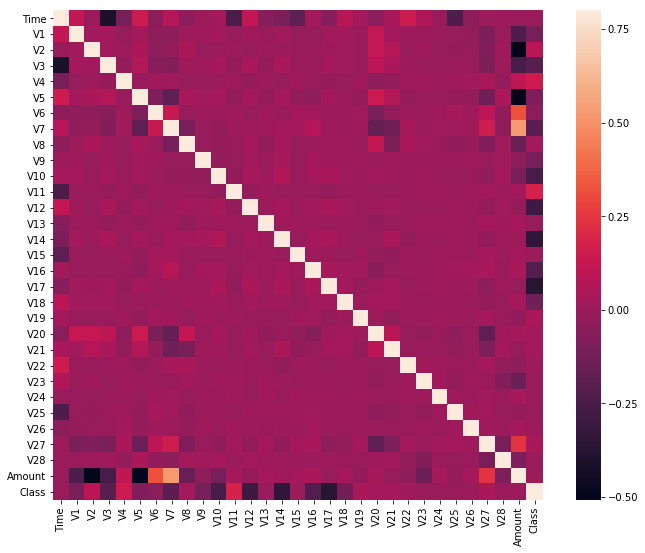

In [55]:
#correlation matrix
corrmat = dataset.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat, vmax=0.8,square = True)
plt.show()


In [43]:
# fraud transactions and valid transactions
#in dataset fraud transactions are shown whose class is 1 and valid transaction have value 0

fraud = dataset[dataset["Class"]== 1]
valid = dataset[dataset["Class"]== 0]

In [44]:
#we need to compute outlier fraction value which will be used as contamination value while creating
#object of IsolationForest class which is used for anomaly detection in the dataset

outlier_fraction = len(fraud)/float(len(valid))


In [45]:

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [46]:
state = 1

#define outlier detection method
classifier = {
    "Isolation Forest":IsolationForest(behaviour='new',
                                       max_samples = len(x),
                                       contamination = outlier_fraction,
                                       random_state = state),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors = 20,
                                              contamination = outlier_fraction)
}

In [51]:
# fitting to training set and getting predictions

n_outlier = len(fraud)

for i, (clf_name,clf) in enumerate(classifier.items()):
    
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(x)
        scores_pred = clf.decision_function(x)
        y_pred = clf.predict(x)
    
    #reshape the predict values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    # total no of errors in our prediction
    n_errors = (y_pred != y).sum()
    
        # run classification metrics
    print('{} : {}'.format(clf_name , n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y,y_pred))

Isolation Forest : 73
0.9974368877497279
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28426
           1       0.34      0.35      0.34        55

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.67      0.67      0.67     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor : 109
0.9961728871879498
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28426
           1       0.02      0.02      0.02        55

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

